<a href="https://colab.research.google.com/github/Nguyenthanhtrung99/Data-science/blob/master/Python_Basics_for_Data_Science_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df = pd.read_csv(boston_url)

In [ ]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


### Boxplot for the median value of owner-occupied homes

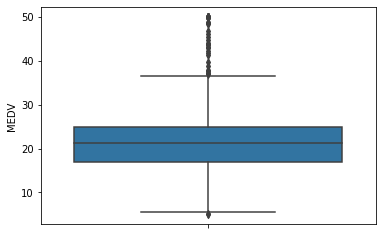

In [ ]:
sns.boxplot(y='MEDV', data=boston_df)

### Histogram for the Charles river variable

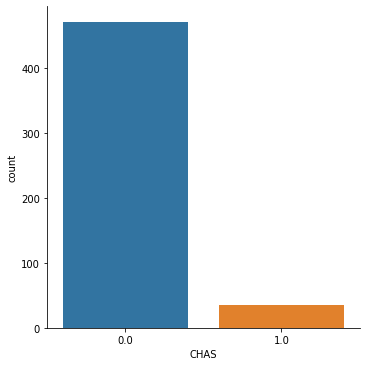

In [ ]:
sns.catplot(x='CHAS', kind='count', data=boston_df)

In [ ]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

In [ ]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,age_group
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70 years
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70 years
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70 years
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70 years


### Boxplot for the MEDV variable vs the AGE variable

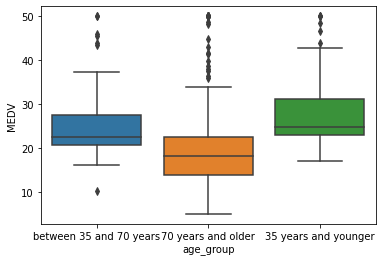

In [ ]:
sns.boxplot(x='age_group', y='MEDV', data=boston_df)

### Scatter plot between nitric oxide concentrations and the proportion of non-retail business acres per town

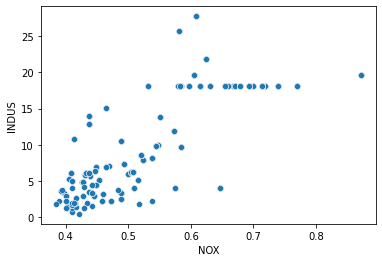

In [ ]:
sns.scatterplot(x='NOX',y='INDUS',data=boston_df)

### Histogram for the pupil to teacher ratio variable

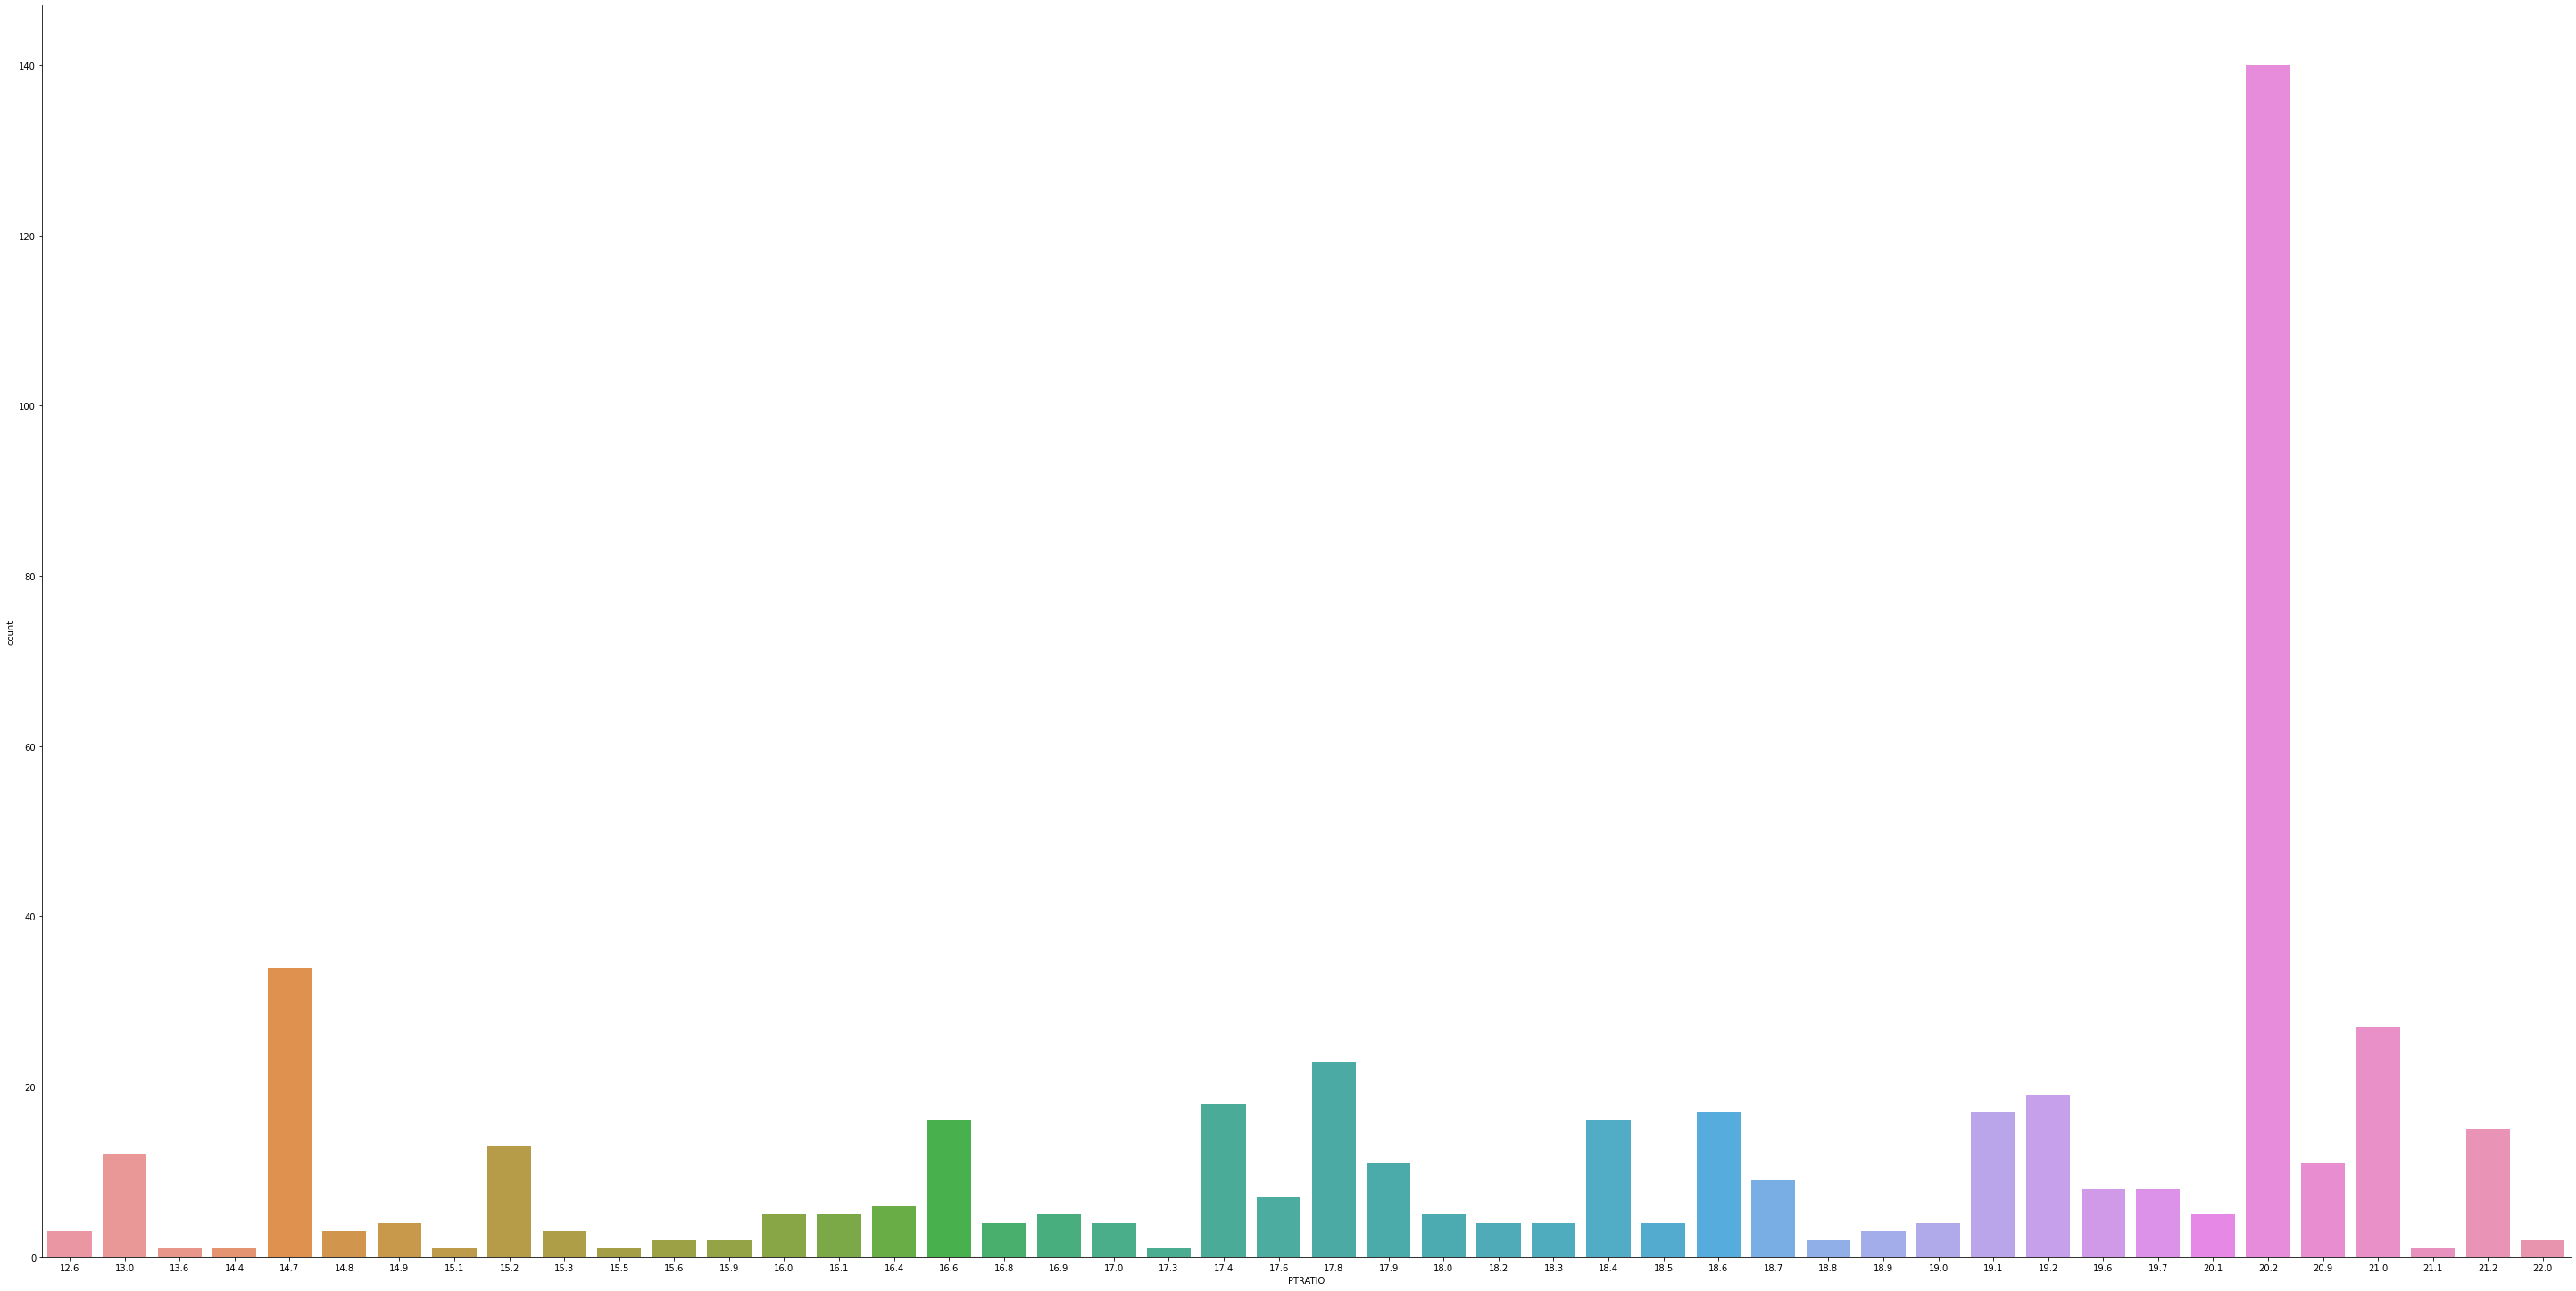

In [ ]:
sns.catplot(x='PTRATIO', kind='count', data=boston_df, height=20, aspect=2)

### Is there a significant difference in median value of houses bounded by the Charles river or not?

In [ ]:
import scipy.stats

Hypothesis

-   $H_0: µ_1 = µ_2$ ("there is no difference in median value of houses bounded by the Charles")
-   $H_1: µ_1 ≠ µ_2$ ("there is a difference in median value of houses bounded by the Charles")


[văn bản liên kết](https://)We plot the dependent variable with a historgram

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Normal Distribution')]

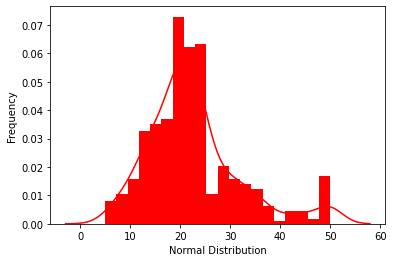

In [ ]:
ax = sns.distplot(boston_df['MEDV'],
                  bins=20,
                  kde=True,
                  color='red',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Normal Distribution', ylabel='Frequency')

Test for equality of variance

In [ ]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 0.0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1.0]['MEDV'], center='mean')

LeveneResult(statistic=8.751904896045998, pvalue=0.003238119367639829)

Since the p-value is less than 0.05 we can't assume equality of variance

In [ ]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0.0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1.0]['MEDV'], equal_var = False)

Ttest_indResult(statistic=-3.113291312794837, pvalue=0.003567170098137517)

**Conclusion:** Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in median value of houses based on if they are bounded by the Charles river or not.

### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?

We use the groups created above as the one-way ANOVA can't work with continuous variable

Hypothesis

-   $H_0: µ_1 = µ_2 = µ_3$ (the three population means are equal)
-   $H_1:$ At least one of the means differ


Test for equality of variance

In [ ]:
scipy.stats.levene(boston_df[boston_df['age_group'] == '35 years and younger']['MEDV'],
                   boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV'],
                   boston_df[boston_df['age_group'] == '70 years and older']['MEDV'], 
                   center='mean')

LeveneResult(statistic=2.780620029374844, pvalue=0.06295337343259205)

Since the p-value is greater than 0.05, the variance are equal.

We separate the three samples (one for each category) into a variable each.


In [ ]:
thirtyfive_lower = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
thirtyfive_seventy = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
seventy_older = boston_df[boston_df['age_group'] == '70 years and older']['MEDV'] 

In [ ]:
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


**Conclusion:** Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that at least one of the means differ.

### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?

Hypothesis:

-   $H_0:$ Nitric oxide concentrations is not correlated with proportion of non-retail business acres per town
-   $H_1:$ Nitric oxide concentrations is correlated with proportion of non-retail business acres per town


Since they are both continuous variables we can use a pearson correlation test and draw a scatter plot


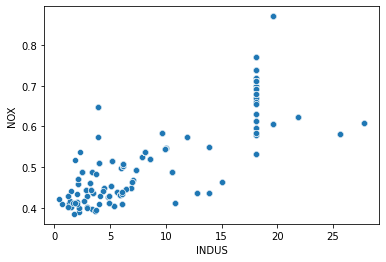

In [ ]:
sns.scatterplot(x="INDUS", y="NOX", data=boston_df)

In [ ]:
scipy.stats.pearsonr(boston_df['INDUS'], boston_df['NOX'])

(0.7636514469209154, 7.913361061236894e-98)

**Conclusion:** Since the p-value < 0.05, we reject the Null hypothesis and conclude that there  exists a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? 

In [ ]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Hypothesis:

-   $H_0:$ Weighted distance to the five Boston employment centres has no effect on the median value of owner occupied homes
-   $H_1:$ Weighted distance to the five Boston employment centres has an effect on the median value of owner occupied homes

In [ ]:
## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 04 Sep 2021   Prob (F-statistic):           1.21e-08
Time:                        22:02:42   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion:** As the p-value is less than the alpha level = 0.05, so we reject the null hypothesis as there is evidence that there is a difference in the median value of owner occupied homes based on the weighted distances to the five Boston employment centres. 